<a href="https://colab.research.google.com/github/babialvesz/longevidade/blob/main/tratamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#instalando pacotes

%pip install pandas numpy matplotlib

In [32]:
!pip install openpyxl xlrd

In [33]:
#importanto pacotes e 'renomeando' para o uso

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Tratando dados da População por idade**



In [34]:
#lendo (.read) os arquivos csv cujo o delimitador é ';'

df_pop = pd.read_csv('/content/pop_por_idade.csv', delimiter=';')

In [35]:
#excluindo colunas, que é referenciado pelo 'axis=1 (se 'axis=0', ele irá se refirir a linhas), com o '.drop'

df_pop = df_pop.drop('15 a 17 anos', axis=1)

In [36]:
df_pop = df_pop.drop('Idade ignorada', axis=1)

In [37]:
#somando '.sum' duas colunas 'axis=1'

df_pop['20 a 29 anos']  = df_pop[['20 a 24 anos', '25 a 29 anos']].sum(axis=1)

In [38]:
#excluindo multiplas colunas passando uma lista dentro de []

df_pop = df_pop.drop(['Total', '20 a 24 anos', '25 a 29 anos', ], axis=1)

In [39]:
#ordenando as colunas

df_pop = df_pop[['Cód.', 'Unidade da Federação', '0 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos', '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 anos ou mais']]

In [40]:
df_pop.head()

,Cód.,Unidade da Federação,0 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 anos ou mais
0,11,Rondônia,113450,117536,117166,122058,250571,253223,230699,180447,118007,78039
1,12,Acre,71001,74586,75573,78689,146095,125875,108066,71717,45538,32878
2,13,Amazonas,351726,367770,355930,367978,695041,596414,510664,339108,215739,141243
3,14,Roraima,64752,63243,58213,56875,114411,98674,78224,51855,31467,18993
4,15,Pará,632045,669620,689277,726778,1373851,1291231,1094817,766180,507379,368953


##**Tratando dados de óbitos por federação**

In [41]:
#lendo (.read) os arquivos csv cujo o delimitador é ';'

df_mort = pd.read_csv('/content/mortalidade_2022.csv', delimiter=';', encoding='ISO-8859-1')

In [42]:
#excluindo colunas, que é referenciado pelo 'axis=1 (se 'axis=0', ele irá se refirir a linhas), com o '.drop'

df_mort.drop('Total', axis=1, inplace=True)

In [43]:
#excluindo NaN - '.dropna()'

df_mort = df_mort.dropna()

In [44]:
#separando elementos de uma mesma célula para colunas diferentes

df_mort[['Cód.', 'Unidade da Federação']] = df_mort['Unidade da Federação'].str.split(' ', n=1, expand=True)

In [45]:
#somando colunas

df_mort['0 a 4 anos']  = df_mort[['Menor 1 ano', '1 a 4 anos']].sum(axis=1)

In [46]:
#excluindo multiplas colunas passando uma lista dentro de []

df_mort = df_mort.drop(['Menor 1 ano', '1 a 4 anos', '80 anos e mais', 'Idade ignorada'], axis=1)

In [47]:
#ordenando as colunas

df_mort = df_mort[['Cód.', 'Unidade da Federação', '0 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos', '20 a 29 anos', '30 a 39 anos',  '40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 a 79 anos']]

In [48]:
#renomeando colunas

df_mort = df_mort.rename(columns={'70 a 79 anos': '70 anos ou mais'})

In [49]:
df_mort.head()

,Cód.,Unidade da Federação,0 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 anos ou mais
0,11,Rondônia,403.0,23.0,54.0,138.0,474.0,606.0,875.0,1238.0,1776.0,2168.0
1,12,Acre,299.0,16.0,31.0,89.0,205.0,257.0,317.0,466.0,692.0,770.0
2,13,Amazonas,1411.0,100.0,130.0,450.0,1495.0,1371.0,1676.0,2255.0,3174.0,3564.0
3,14,Roraima,322.0,24.0,38.0,81.0,248.0,281.0,286.0,379.0,533.0,518.0
4,15,Pará,2273.0,189.0,284.0,848.0,2830.0,2821.0,3619.0,4859.0,7408.0,8653.0


##**Calculando taxa de mortalidade**

In [50]:
merged_df = pd.merge(df_pop, df_mort, on='Unidade da Federação', suffixes=('_pop', '_obitos'))

In [51]:
faixas_etarias = ['0 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos', '20 a 29 anos',
                  '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 anos ou mais']


In [52]:
sns.set(style="whitegrid")

In [53]:
merged_df.head()

,Cód._pop,Unidade da Federação,0 a 4 anos_pop,5 a 9 anos_pop,10 a 14 anos_pop,15 a 19 anos_pop,20 a 29 anos_pop,30 a 39 anos_pop,40 a 49 anos_pop,50 a 59 anos_pop,...,0 a 4 anos_obitos,5 a 9 anos_obitos,10 a 14 anos_obitos,15 a 19 anos_obitos,20 a 29 anos_obitos,30 a 39 anos_obitos,40 a 49 anos_obitos,50 a 59 anos_obitos,60 a 69 anos_obitos,70 anos ou mais_obitos
0,11,Rondônia,113450,117536,117166,122058,250571,253223,230699,180447,...,403.0,23.0,54.0,138.0,474.0,606.0,875.0,1238.0,1776.0,2168.0
1,12,Acre,71001,74586,75573,78689,146095,125875,108066,71717,...,299.0,16.0,31.0,89.0,205.0,257.0,317.0,466.0,692.0,770.0
2,13,Amazonas,351726,367770,355930,367978,695041,596414,510664,339108,...,1411.0,100.0,130.0,450.0,1495.0,1371.0,1676.0,2255.0,3174.0,3564.0
3,14,Roraima,64752,63243,58213,56875,114411,98674,78224,51855,...,322.0,24.0,38.0,81.0,248.0,281.0,286.0,379.0,533.0,518.0
4,15,Pará,632045,669620,689277,726778,1373851,1291231,1094817,766180,...,2273.0,189.0,284.0,848.0,2830.0,2821.0,3619.0,4859.0,7408.0,8653.0


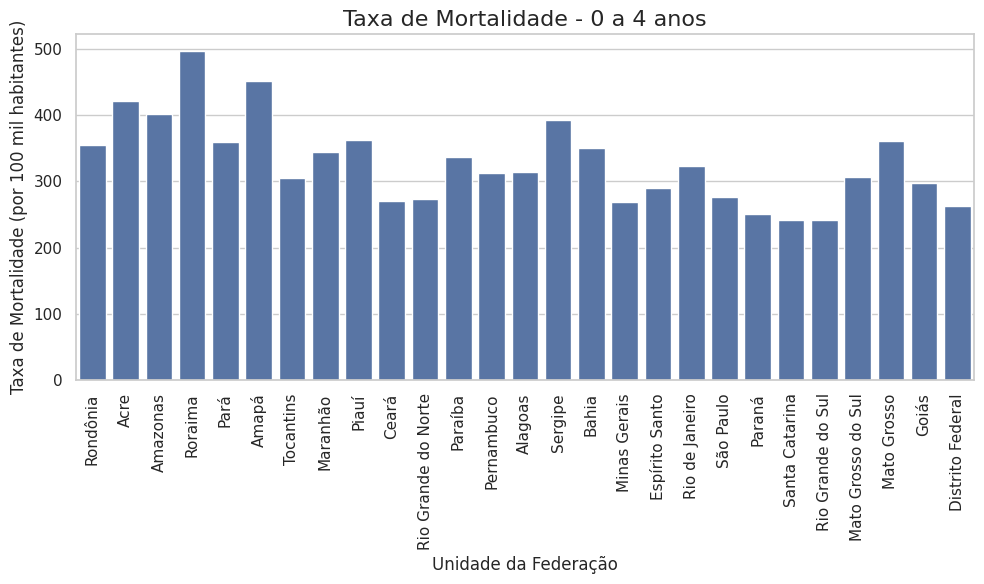

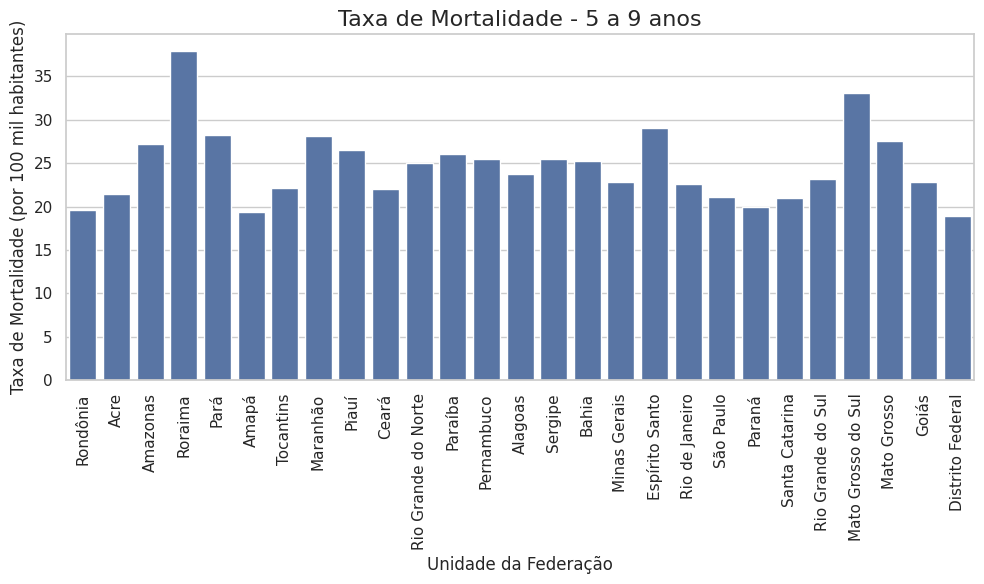

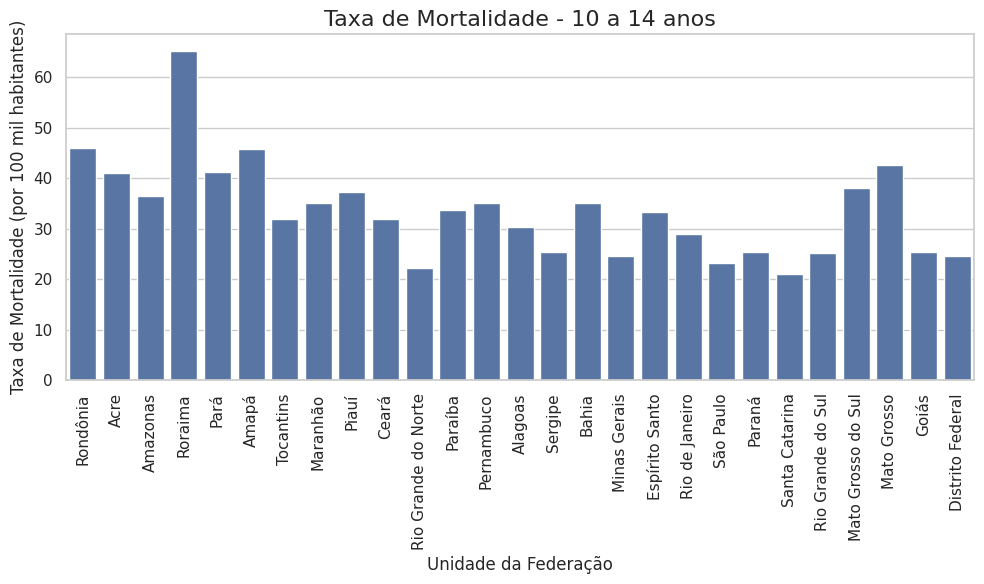

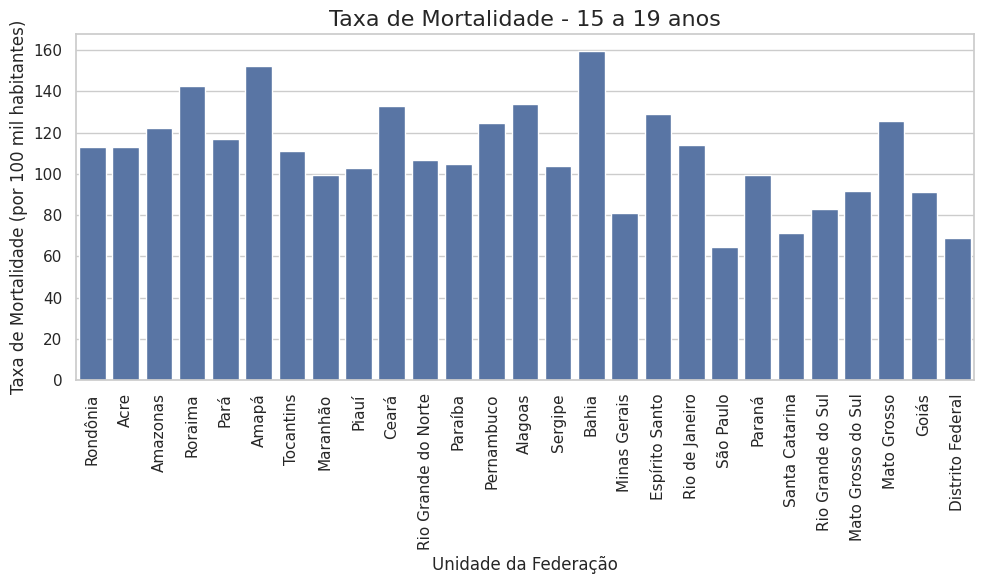

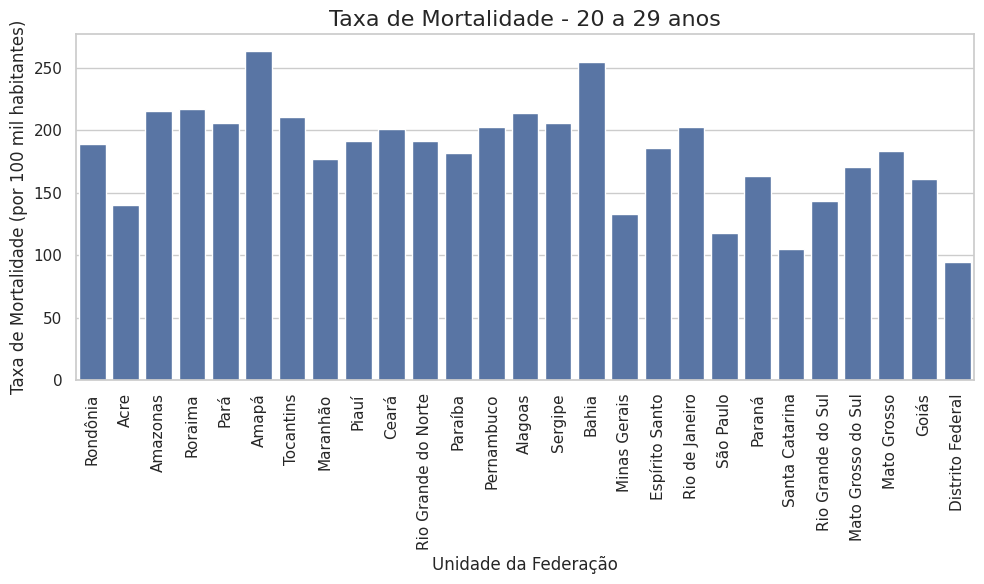

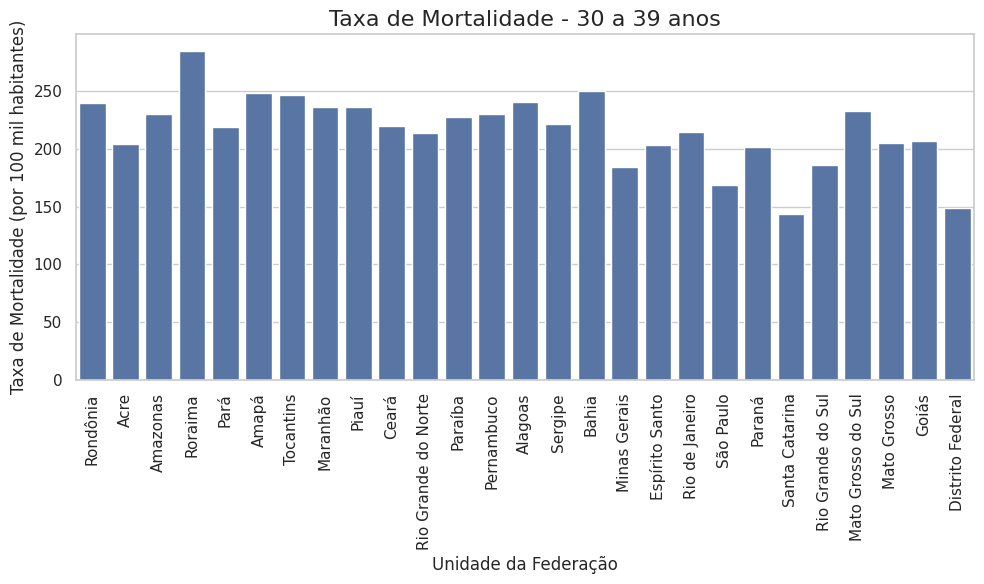

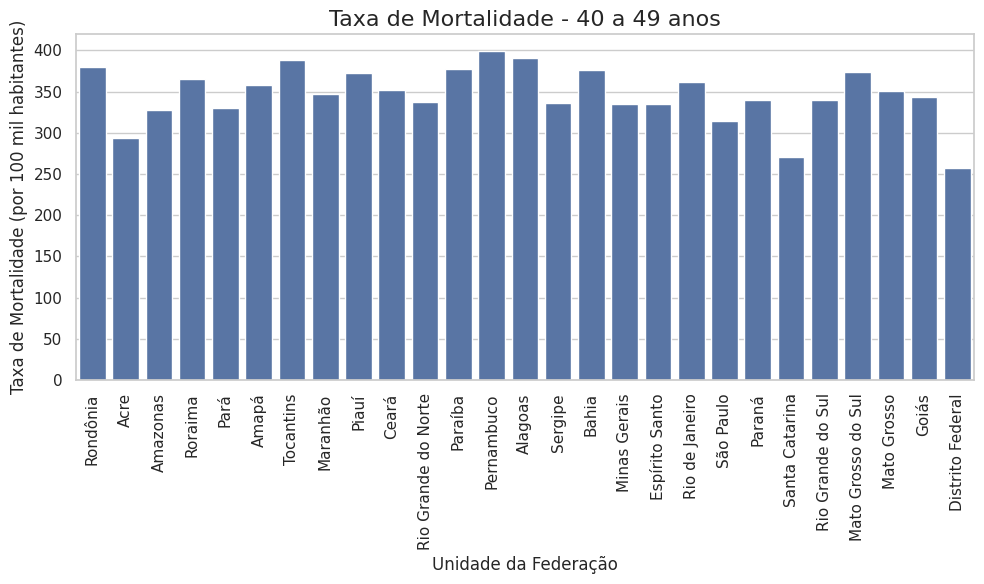

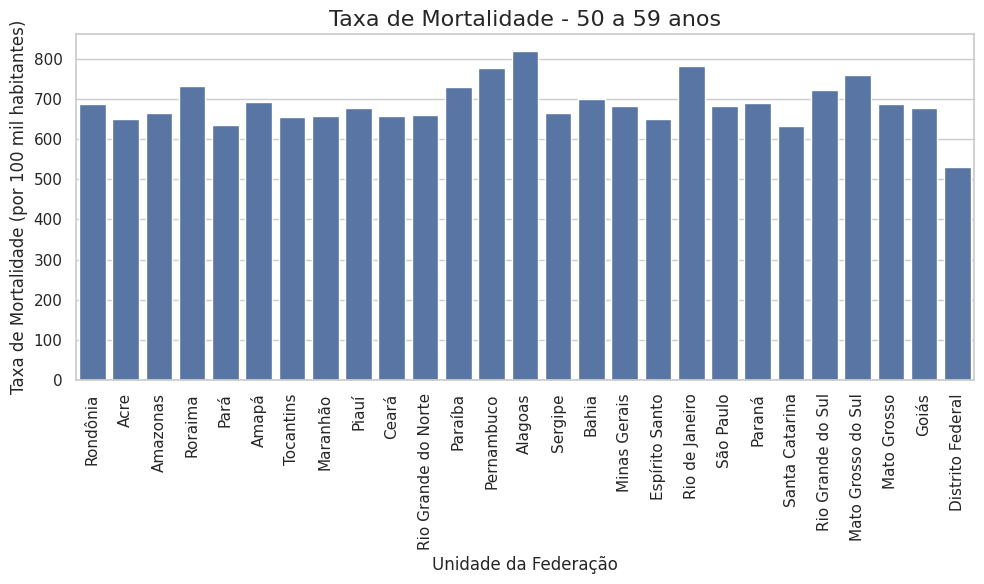

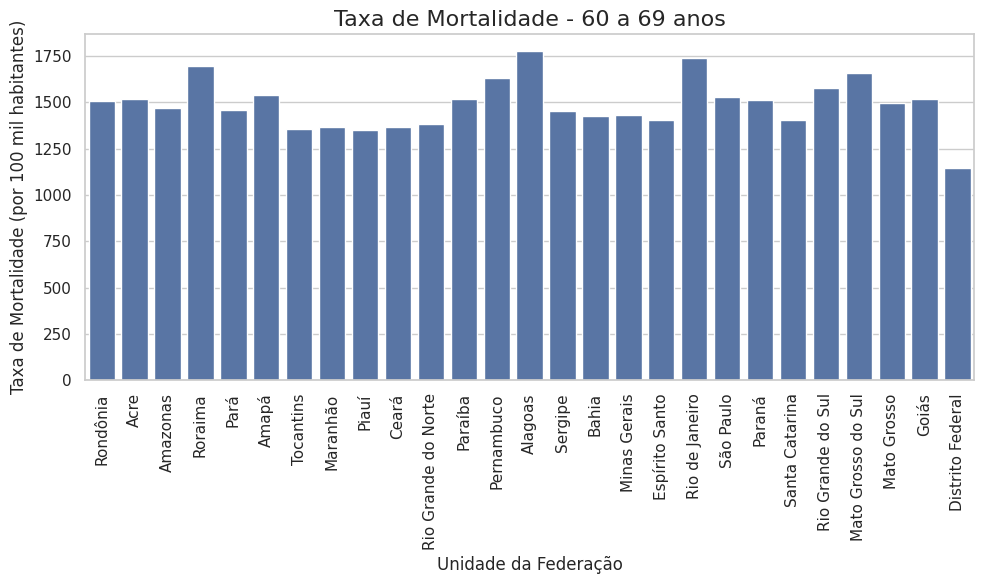

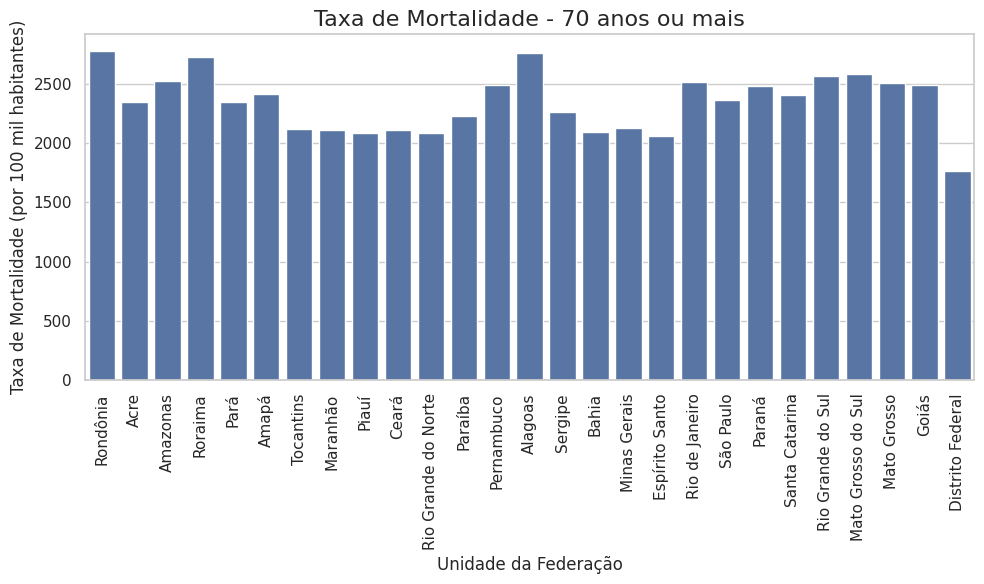

In [54]:
for faixa in faixas_etarias:
    # Cálculo correto da taxa de mortalidade
    merged_df[f'taxa_mortalidade_{faixa}'] = (merged_df[f'{faixa}_obitos'] / merged_df[f'{faixa}_pop']) * 100000

    # Geração do gráfico de barras para cada faixa etária
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Unidade da Federação', y=f'taxa_mortalidade_{faixa}', data=merged_df)

    # Configurações do gráfico
    plt.title(f'Taxa de Mortalidade - {faixa}', fontsize=16)
    plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X
    plt.xlabel('Unidade da Federação')
    plt.ylabel('Taxa de Mortalidade (por 100 mil habitantes)')
    plt.tight_layout()
    plt.show()  # Adiciona para garantir que o gráfico seja exibido

O gráfico apresentado exibe a taxa de mortalidade para a faixa etária de 0 a 4 anos em diferentes Unidades da Federação do Brasil. A taxa de mortalidade é expressa como um valor multiplicado por 10'7'- potência 7-, como indicado no eixo y. A Unidade da Federação, ou seja, os estados brasileiros e o Distrito Federal, são mostrados no eixo x.

##Sobreviventes em cada faixa etária

*   Item da lista
*   Item da lista



In [55]:
merged_df.columns

Index(['Cód._pop', 'Unidade da Federação', '0 a 4 anos_pop', '5 a 9 anos_pop',
       '10 a 14 anos_pop', '15 a 19 anos_pop', '20 a 29 anos_pop',
       '30 a 39 anos_pop', '40 a 49 anos_pop', '50 a 59 anos_pop',
       '60 a 69 anos_pop', '70 anos ou mais_pop', 'Cód._obitos',
       '0 a 4 anos_obitos', '5 a 9 anos_obitos', '10 a 14 anos_obitos',
       '15 a 19 anos_obitos', '20 a 29 anos_obitos', '30 a 39 anos_obitos',
       '40 a 49 anos_obitos', '50 a 59 anos_obitos', '60 a 69 anos_obitos',
       '70 anos ou mais_obitos', 'taxa_mortalidade_0 a 4 anos',
       'taxa_mortalidade_5 a 9 anos', 'taxa_mortalidade_10 a 14 anos',
       'taxa_mortalidade_15 a 19 anos', 'taxa_mortalidade_20 a 29 anos',
       'taxa_mortalidade_30 a 39 anos', 'taxa_mortalidade_40 a 49 anos',
       'taxa_mortalidade_50 a 59 anos', 'taxa_mortalidade_60 a 69 anos',
       'taxa_mortalidade_70 anos ou mais'],
      dtype='object')

In [62]:
df_pop2 = pd.read_csv('/content/pop_completo.csv', delimiter=';')

In [65]:
df_pop2 = df_pop2.drop([1143, 1144, 1145, 1146, 1147], axis=0)

In [70]:
df_pop2 = df_pop2.drop([1138, 1139, 1140, 1141, 1142], axis=0)

In [72]:
df_pop2 = df_pop2.drop([1133, 1134, 1135, 1136, 1137], axis=0)

In [ ]:

#df_pop2 = df_pop2.drop(df_pop2.index[LINHAX:LINHAY])

In [80]:
df_pop2

,Cód.,Unidade da Federação,Idade,Sexo,Total
0,11,Rondônia,0 a 4 anos,Homens,57661.0
1,11,Rondônia,0 a 4 anos,Mulheres,55789.0
2,11,Rondônia,5 a 9 anos,Homens,59904.0
3,11,Rondônia,5 a 9 anos,Mulheres,57632.0
4,11,Rondônia,10 a 14 anos,Homens,59741.0
...,...,...,...,...,...
1128,53,Distrito Federal,90 a 94 anos,Homens,1999.0
1129,53,Distrito Federal,90 a 94 anos,Mulheres,4122.0
1130,53,Distrito Federal,95 a 99 anos,Homens,478.0
1131,53,Distrito Federal,95 a 99 anos,Mulheres,1242.0


In [75]:
faixas_65_mais = ['65 a 69 anos', '70 a 74 anos', '75 a 79 anos', '80 a 84 anos',
                  '85 a 89 anos', '90 a 94 anos', '95 a 99 anos', '100 anos ou mais']

In [77]:
faixas_75_mais = ['75 a 79 anos', '80 a 84 anos', '85 a 89 anos', '90 a 94 anos',
                  '95 a 99 anos', '100 anos ou mais']

In [78]:
df_65_mais = df_pop2[df_pop2['Idade'].isin(faixas_65_mais)]
df_75_mais = df_pop2[df_pop2['Idade'].isin(faixas_75_mais)]

In [79]:
pop_65_mais = df_65_mais.groupby('Unidade da Federação')['Total'].sum()
pop_75_mais = df_75_mais.groupby('Unidade da Federação')['Total'].sum()

In [81]:
df_longevidade = pd.DataFrame({
    'Pop_65+': pop_65_mais,
    'Pop_75+': pop_75_mais
})


In [82]:
df_longevidade['IL'] = (df_longevidade['Pop_75+'] / df_longevidade['Pop_65+']) * 100

In [83]:
print(df_longevidade[['Pop_65+', 'Pop_75+', 'IL']])

                        Pop_65+    Pop_75+         IL
Unidade da Federação                                 
Acre                    52570.0    19099.0  36.330607
Alagoas                279880.0   103766.0  37.075175
Amapá                   40153.0    14239.0  35.461858
Amazonas               233608.0    80306.0  34.376391
Bahia                 1506024.0   613201.0  40.716549
Ceará                  912559.0   377547.0  41.372339
Distrito Federal       248353.0    92216.0  37.131019
Espírito Santo         430983.0   157960.0  36.651098
Goiás                  648873.0   235262.0  36.257018
Maranhão               572493.0   225039.0  39.308603
Mato Grosso            282040.0    97284.0  34.492980
Mato Grosso do Sul     264446.0    97409.0  36.835119
Minas Gerais          2543092.0   988329.0  38.863281
Paraná                1298870.0   478777.0  36.861041
Paraíba                438637.0   183528.0  41.840520
Pará                   589034.0   214713.0  36.451716
Pernambuco             92340

<ipython-input-84-a0004364eb9e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_longevidade_sorted.index, y=df_longevidade_sorted['IL'], palette="Blues_d")


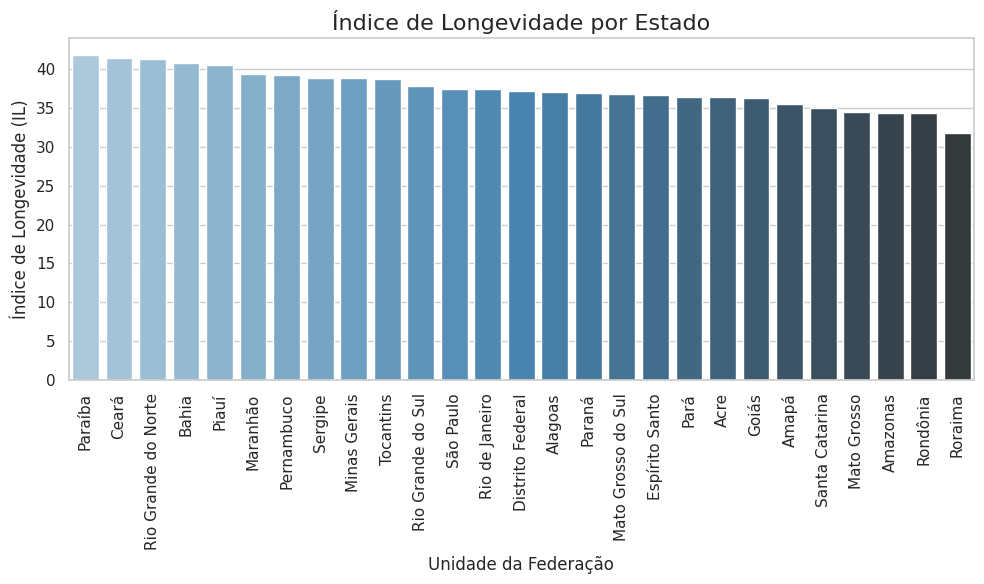

In [84]:
df_longevidade_sorted = df_longevidade.sort_values(by='IL', ascending=False)

# Configurar o estilo do Seaborn para gráficos mais bonitos
sns.set(style="whitegrid")

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=df_longevidade_sorted.index, y=df_longevidade_sorted['IL'], palette="Blues_d")

# Adicionar rótulos e título
plt.title('Índice de Longevidade por Estado', fontsize=16)
plt.xlabel('Unidade da Federação', fontsize=12)
plt.ylabel('Índice de Longevidade (IL)', fontsize=12)

# Girar os rótulos do eixo X para melhor legibilidade
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.tight_layout()
plt.show()